c:\Users\elpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\elpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,loss,val_AUC,val_Precision,val_Recall,val_loss
  current = self.get_monitor_value(logs)
c:\Users\elpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\callback_list.py:171: UserWarning: Learning rate reduction is conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,loss,val_AUC,val_Precision,val_Recall,val_loss,lea

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Val ROC-AUC: 0.9925177702955481
Val PR-AUC: 0.9920210499494402
Best threshold (val): 0.18 F1: 0.9570552147239264
              precision    recall  f1-score   support

           0      1.000     0.970     0.985       100
           1      0.964     1.000     0.982        80

    accuracy                          0.983       180
   macro avg      0.982     0.985     0.983       180
weighted avg      0.984     0.983     0.983       180


=== MATRIZ DE CONFUSIÓN ===

Validación:
[[95  4]
 [ 3 78]]

Test:
[[97  3]
 [ 0 80]]

Matriz de confusión guardada como 'mlp_confusion_matrix.png'


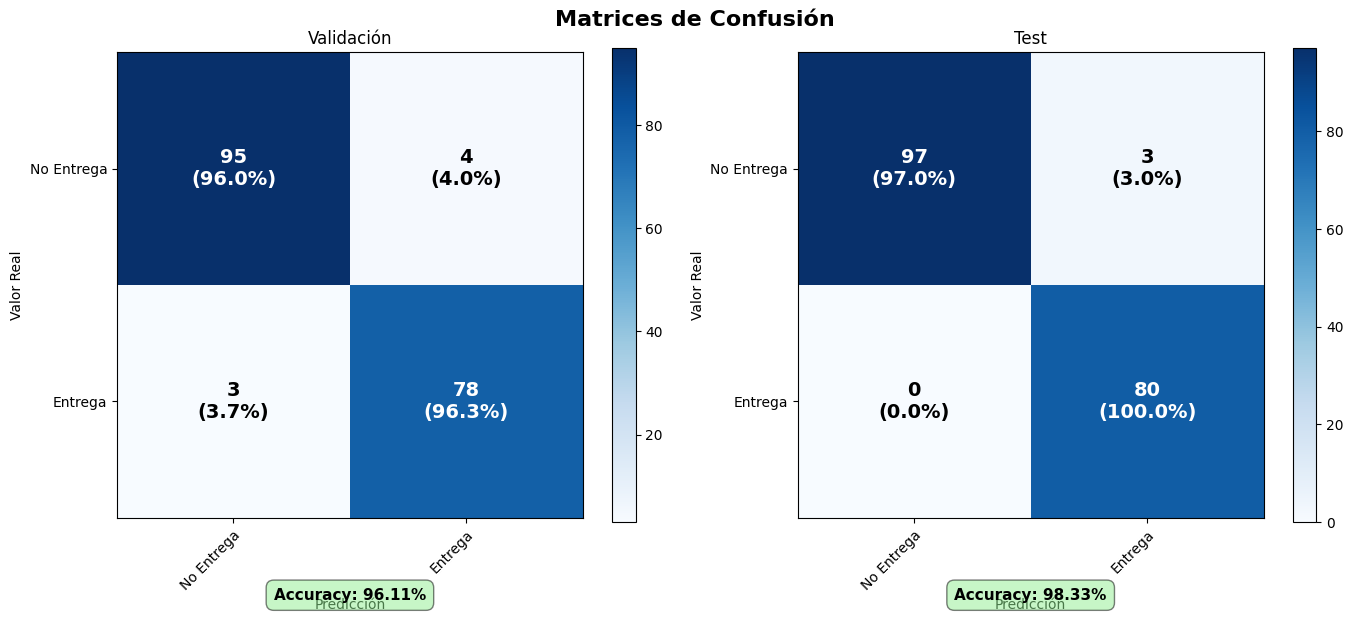


=== MÉTRICAS DETALLADAS (TEST SET) ===

Valores de la matriz:
  True Negatives (TN):    97 - Correctamente predicho como NO entrega
  False Positives (FP):    3 - Incorrectamente predicho como SÍ entrega
  False Negatives (FN):    0 - Incorrectamente predicho como NO entrega
  True Positives (TP):    80 - Correctamente predicho como SÍ entrega

Métricas calculadas:
  Accuracy:    0.9833 (98.33%)
  Precision:   0.9639 (96.39%)
  Recall:      1.0000 (100.00%)
  Specificity: 0.9700 (97.00%)
  F1-Score:    0.9816
  Error Rate:  0.0167 (1.67%)

=== HISTORIAL DE ENTRENAMIENTO ===
Épocas entrenadas: 100
Métricas disponibles: ['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss', 'learning_rate']
Mapeo de métricas: {}

Gráfica guardada como 'mlp_training_history.png'


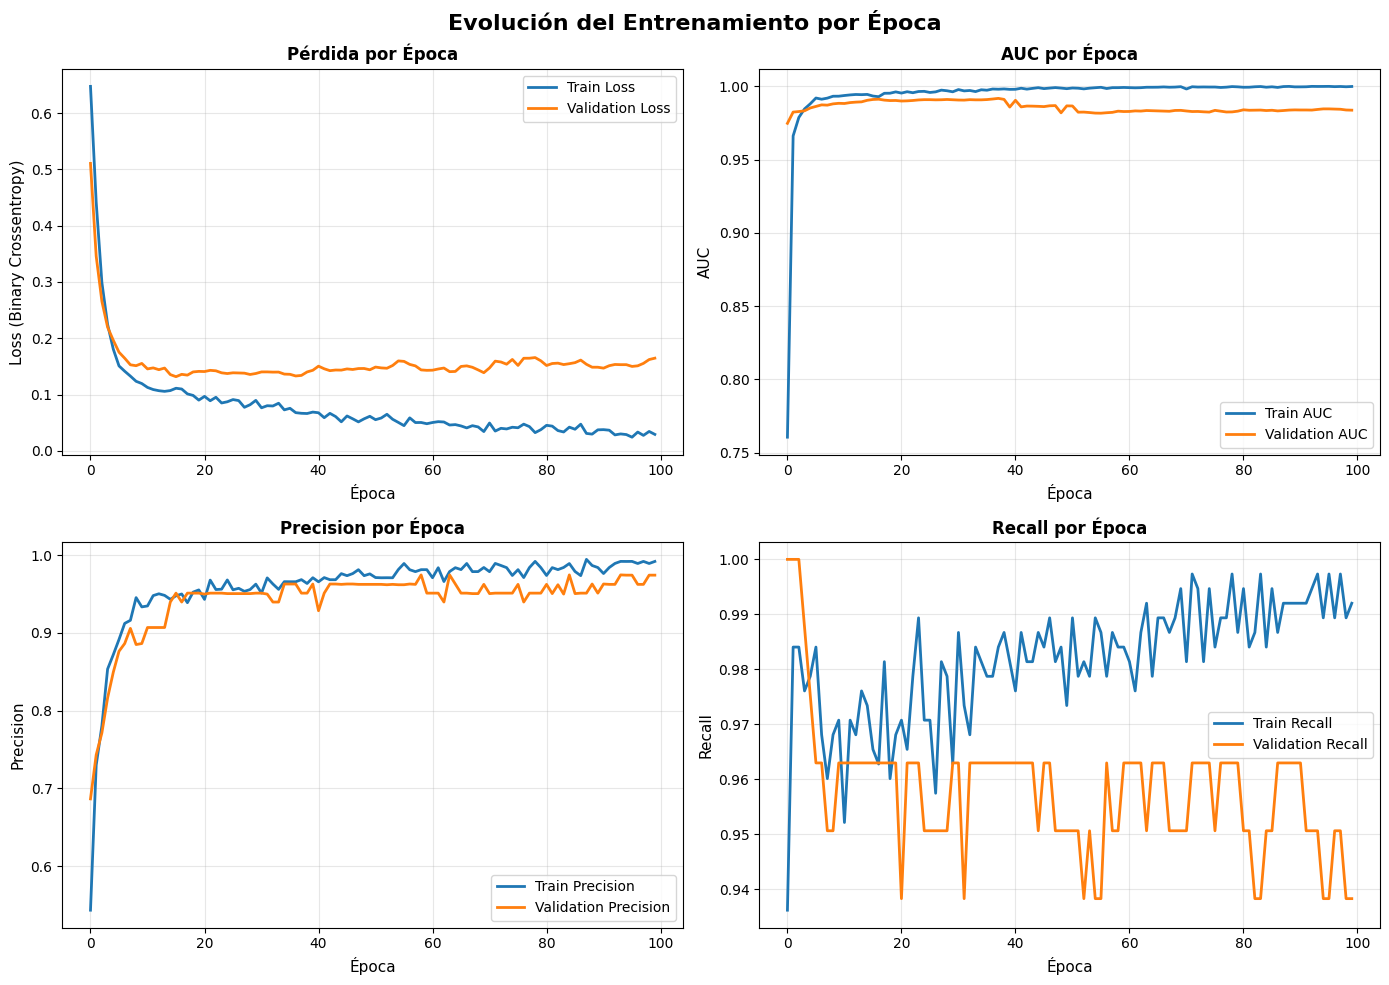


=== MÉTRICAS FINALES ===

Época final: 99
Train Loss: 0.0292
Val Loss: 0.1646
Train AUC: 0.9998
Val AUC: 0.9837
Train PRECISION: 0.9920
Val PRECISION: 0.9744
Train RECALL: 0.9920
Val RECALL: 0.9383
Train LEARNING_RATE: 0.0010

=== INFORMACIÓN DE PESOS DEL MODELO ===

Total de capas: 6
Capas entrenables: 6

--- Capa 1: dense_28 (Dense) ---
  Activación: relu
  Forma de entrada: (None, 14)
  Forma de salida: (None, 64)
  Matriz de pesos (W): (14, 64)
    - Rango: [-0.6465, 0.5968]
    - Media: 0.0057
    - Desviación estándar: 0.1804
  Vector de sesgos (b): (64,)
    - Rango: [-0.1384, 0.2014]
    - Media: 0.0212
  Parámetros en esta capa: 960

--- Capa 2: dropout_14 (Dropout) ---
  Sin pesos (capa de regularización)

--- Capa 3: dense_29 (Dense) ---
  Activación: relu
  Forma de entrada: (None, 64)
  Forma de salida: (None, 32)
  Matriz de pesos (W): (64, 32)
    - Rango: [-0.4412, 0.4152]
    - Media: 0.0127
    - Desviación estándar: 0.1514
  Vector de sesgos (b): (32,)
    - Rango: 

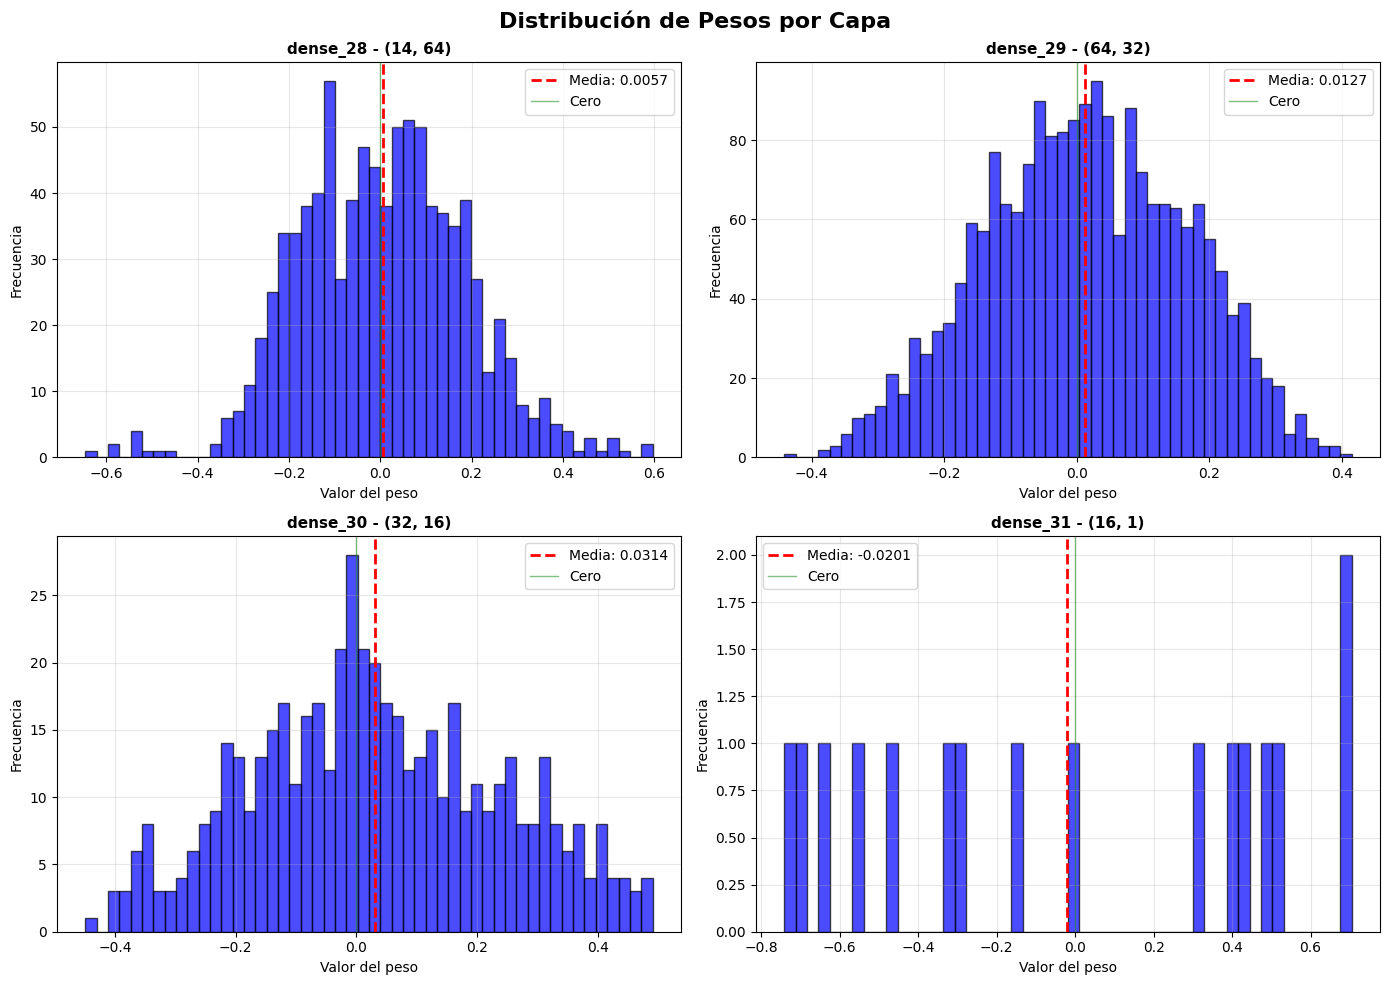


=== ARQUITECTURA DE LA RED NEURONAL ===
Gráfica de arquitectura guardada como 'mlp_architecture.png'


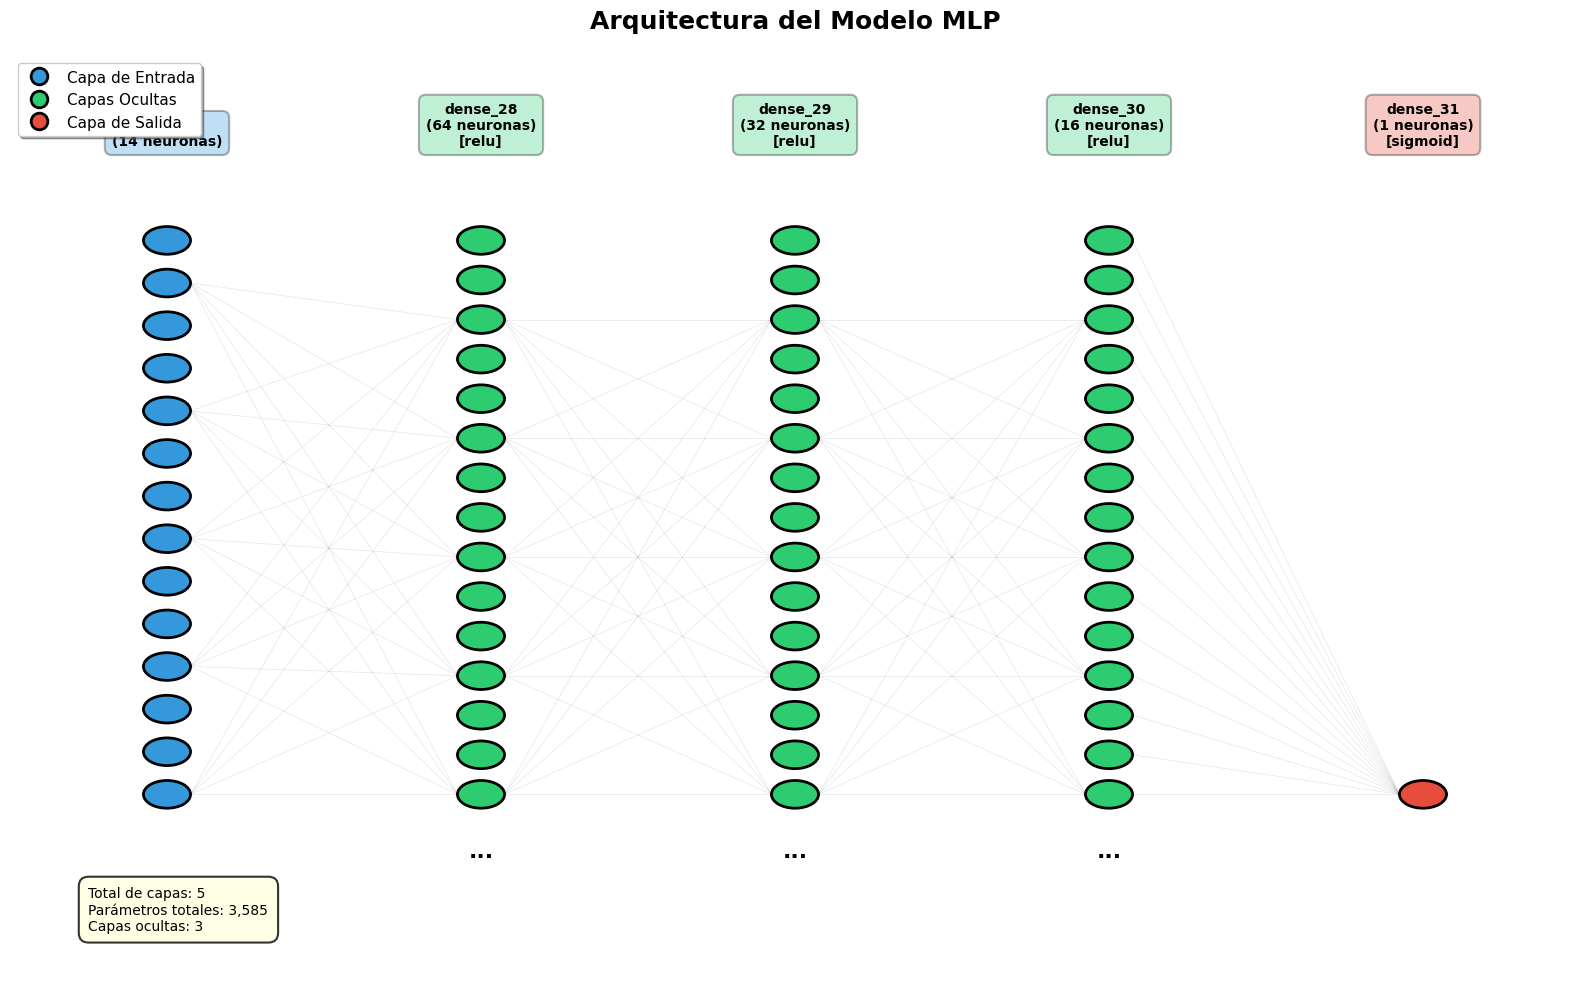


=== RESUMEN DE ARQUITECTURA ===
CAPA DE ENTRADA
  └─ Neuronas: 14 (features del dataset)
CAPA OCULTA #1
  └─ Nombre: dense_28
  └─ Neuronas: 64
  └─ Activación: relu
CAPA OCULTA #2
  └─ Nombre: dense_29
  └─ Neuronas: 32
  └─ Activación: relu
CAPA OCULTA #3
  └─ Nombre: dense_30
  └─ Neuronas: 16
  └─ Activación: relu
CAPA DE SALIDA
  └─ Neuronas: 1
  └─ Activación: sigmoid
  └─ Tipo: Clasificación binaria

=== GUARDANDO MODELO ENTRENADO ===
✓ Modelo guardado en formato Keras: mlp_model.keras
✓ Pesos del modelo guardados: mlp_weights.weights.h5
✓ Escalador guardado: scaler.pkl
✓ Información del modelo guardada: model_info.txt
✓ Script de inferencia creado: usar_modelo.py

RESUMEN DE ARCHIVOS GUARDADOS:
📁 mlp_model.keras - Modelo completo (recomendado)
📁 mlp_weights.weights.h5 - Solo pesos del modelo
📁 scaler.pkl - Escalador de datos
📄 model_info.txt - Información detallada del modelo
🐍 usar_modelo.py - Script para usar el modelo
📊 mlp_training_history.png - Gráficas de entrenamiento
📊

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

# 1) Carga
df = pd.read_csv("dataset_entregas_MLP_sin_grupo.csv")

y = df["EntregaATiempo"].values.astype(int)
X = df.drop(columns=["EntregaATiempo"]).values

# 2) Split 70/15/15
X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_va, X_te, y_va, y_te = train_test_split(X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=42)

# 3) Escalado
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_va = sc.transform(X_va)
X_te = sc.transform(X_te)

# 4) Pesos de clase (opcional si hay desbalance)
classes = np.unique(y_tr)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_tr)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}

# 5) Modelo
n_feat = X_tr.shape[1]
model = Sequential([
    Dense(64, activation="relu", kernel_regularizer=l2(1e-4), input_shape=(n_feat,)),
    Dropout(0.20),
    Dense(32, activation="relu", kernel_regularizer=l2(1e-4)),
    Dropout(0.20),
    Dense(16, activation="relu", kernel_regularizer=l2(1e-4)),
    Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC","Precision","Recall"])

es = EarlyStopping(monitor="val_auc", mode="max", patience=10, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor="val_auc", mode="max", factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=100,
    batch_size=64,
    callbacks=[es, rlr],
    class_weight=class_weight,  # quítalo si no hay desbalance
    verbose=0
)

# 6) Evaluación
p_va = model.predict(X_va).ravel()
p_te = model.predict(X_te).ravel()

print("Val ROC-AUC:", roc_auc_score(y_va, p_va))
print("Val PR-AUC:", average_precision_score(y_va, p_va))

# Umbral óptimo por F1 en validación
ths = np.linspace(0.1, 0.9, 81)
best_th, best_f1 = 0.5, 0
for th in ths:
    f1 = f1_score(y_va, (p_va>=th).astype(int))
    if f1 > best_f1:
        best_f1, best_th = f1, th

print("Best threshold (val):", best_th, "F1:", best_f1)

# Reporte en test con ese umbral
yhat_te = (p_te >= best_th).astype(int)
print(classification_report(y_te, yhat_te, digits=3))

# Matriz de confusión
print("\n=== MATRIZ DE CONFUSIÓN ===")

# Calcular matrices de confusión para validación y test
cm_val = confusion_matrix(y_va, (p_va >= best_th).astype(int))
cm_test = confusion_matrix(y_te, yhat_te)

print("\nValidación:")
print(cm_val)
print("\nTest:")
print(cm_test)

# Visualización de las matrices de confusión
fig_cm, axes_cm = plt.subplots(1, 2, figsize=(14, 6))
fig_cm.suptitle('Matrices de Confusión', fontsize=16, fontweight='bold')

# Función para crear matriz de confusión visualmente atractiva
def plot_confusion_matrix(cm, ax, title, labels=['No Entrega', 'Entrega']):
    """Dibuja una matriz de confusión con anotaciones y porcentajes"""
    # Calcular porcentajes
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Crear el heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    
    # Configurar ticks y etiquetas
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels,
           yticklabels=labels,
           title=title,
           ylabel='Valor Real',
           xlabel='Predicción')
    
    # Rotar las etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Agregar anotaciones con valores y porcentajes
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            percent = cm_percent[i, j]
            text = f'{count}\n({percent:.1f}%)'
            ax.text(j, i, text,
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=14, fontweight='bold')
    
    # Agregar información adicional
    total = cm.sum()
    accuracy = (cm[0, 0] + cm[1, 1]) / total * 100
    ax.text(0.5, -0.15, f'Accuracy: {accuracy:.2f}%', 
            ha='center', va='top', transform=ax.transAxes, 
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.5))

# Graficar matriz de confusión para validación
plot_confusion_matrix(cm_val, axes_cm[0], 'Validación')

# Graficar matriz de confusión para test
plot_confusion_matrix(cm_test, axes_cm[1], 'Test')

plt.tight_layout()
plt.savefig('mlp_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\nMatriz de confusión guardada como 'mlp_confusion_matrix.png'")
plt.show()

# Calcular y mostrar métricas detalladas de la matriz de confusión
print("\n=== MÉTRICAS DETALLADAS (TEST SET) ===")
tn, fp, fn, tp = cm_test.ravel()

print(f"\nValores de la matriz:")
print(f"  True Negatives (TN):  {tn:4d} - Correctamente predicho como NO entrega")
print(f"  False Positives (FP): {fp:4d} - Incorrectamente predicho como SÍ entrega")
print(f"  False Negatives (FN): {fn:4d} - Incorrectamente predicho como NO entrega")
print(f"  True Positives (TP):  {tp:4d} - Correctamente predicho como SÍ entrega")

print(f"\nMétricas calculadas:")
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"  Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision:   {precision:.4f} ({precision*100:.2f}%)")
print(f"  Recall:      {recall:.4f} ({recall*100:.2f}%)")
print(f"  Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  F1-Score:    {f1:.4f}")

# Tasa de error
error_rate = (fp + fn) / (tp + tn + fp + fn)
print(f"  Error Rate:  {error_rate:.4f} ({error_rate*100:.2f}%)")


# 7) Visualización del aprendizaje por época
print("\n=== HISTORIAL DE ENTRENAMIENTO ===")
print(f"Épocas entrenadas: {len(history.history['loss'])}")
print(f"Métricas disponibles: {list(history.history.keys())}")

# Obtener los nombres reales de las métricas
metric_keys = list(history.history.keys())
# Filtrar para obtener solo las métricas de entrenamiento (sin 'val_')
train_metrics = [k for k in metric_keys if not k.startswith('val_') and k != 'loss']

# Crear un diccionario que mapee métricas de entrenamiento a validación
val_metrics_map = {}
for train_metric in train_metrics:
    # Buscar la métrica de validación correspondiente
    for val_key in metric_keys:
        if val_key.startswith('val_') and train_metric in val_key.lower():
            val_metrics_map[train_metric] = val_key
            break

print(f"Mapeo de métricas: {val_metrics_map}")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Evolución del Entrenamiento por Época', fontsize=16, fontweight='bold')

# Subplot 1: Loss (Error)
axes[0, 0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Época', fontsize=11)
axes[0, 0].set_ylabel('Loss (Binary Crossentropy)', fontsize=11)
axes[0, 0].set_title('Pérdida por Época', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Primera métrica (AUC)
if len(train_metrics) > 0:
    metric_name = train_metrics[0]
    val_metric_name = val_metrics_map.get(metric_name, f'val_{metric_name}')
    axes[0, 1].plot(history.history[metric_name], label=f'Train {metric_name.upper()}', linewidth=2)
    if val_metric_name in history.history:
        axes[0, 1].plot(history.history[val_metric_name], label=f'Validation {metric_name.upper()}', linewidth=2)
    axes[0, 1].set_xlabel('Época', fontsize=11)
    axes[0, 1].set_ylabel(metric_name.upper(), fontsize=11)
    axes[0, 1].set_title(f'{metric_name.upper()} por Época', fontsize=12, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# Subplot 3: Segunda métrica (Precision)
if len(train_metrics) > 1:
    metric_name = train_metrics[1]
    val_metric_name = val_metrics_map.get(metric_name, f'val_{metric_name}')
    axes[1, 0].plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}', linewidth=2)
    if val_metric_name in history.history:
        axes[1, 0].plot(history.history[val_metric_name], label=f'Validation {metric_name.capitalize()}', linewidth=2)
    axes[1, 0].set_xlabel('Época', fontsize=11)
    axes[1, 0].set_ylabel(metric_name.capitalize(), fontsize=11)
    axes[1, 0].set_title(f'{metric_name.capitalize()} por Época', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Tercera métrica (Recall)
if len(train_metrics) > 2:
    metric_name = train_metrics[2]
    val_metric_name = val_metrics_map.get(metric_name, f'val_{metric_name}')
    axes[1, 1].plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}', linewidth=2)
    if val_metric_name in history.history:
        axes[1, 1].plot(history.history[val_metric_name], label=f'Validation {metric_name.capitalize()}', linewidth=2)
    axes[1, 1].set_xlabel('Época', fontsize=11)
    axes[1, 1].set_ylabel(metric_name.capitalize(), fontsize=11)
    axes[1, 1].set_title(f'{metric_name.capitalize()} por Época', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mlp_training_history.png', dpi=300, bbox_inches='tight')
print("\nGráfica guardada como 'mlp_training_history.png'")
plt.show()

# Mostrar métricas finales
print("\n=== MÉTRICAS FINALES ===")
final_epoch = len(history.history['loss']) - 1
print(f"\nÉpoca final: {final_epoch}")
print(f"Train Loss: {history.history['loss'][-1]:.4f}")
print(f"Val Loss: {history.history['val_loss'][-1]:.4f}")

# Imprimir todas las métricas disponibles
for metric in train_metrics:
    val_metric = val_metrics_map.get(metric, f'val_{metric}')
    print(f"Train {metric.upper()}: {history.history[metric][-1]:.4f}")
    if val_metric in history.history:
        print(f"Val {metric.upper()}: {history.history[val_metric][-1]:.4f}")

# 8) Información sobre los pesos del modelo
print("\n=== INFORMACIÓN DE PESOS DEL MODELO ===")
print(f"\nTotal de capas: {len(model.layers)}")
print(f"Capas entrenables: {sum([1 for layer in model.layers if layer.trainable])}")

total_params = 0
trainable_params = 0

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if len(weights) > 0:
        print(f"\n--- Capa {i+1}: {layer.name} ({layer.__class__.__name__}) ---")
        print(f"  Activación: {layer.activation.__name__ if hasattr(layer, 'activation') else 'N/A'}")
        
        # Obtener formas de entrada y salida de manera segura
        try:
            input_shape = layer.input.shape if hasattr(layer, 'input') else 'N/A'
            output_shape = layer.output.shape if hasattr(layer, 'output') else 'N/A'
            print(f"  Forma de entrada: {input_shape}")
            print(f"  Forma de salida: {output_shape}")
        except:
            pass
        
        # Pesos (W) y sesgos (b)
        if len(weights) >= 2:
            W, b = weights[0], weights[1]
            print(f"  Matriz de pesos (W): {W.shape}")
            print(f"    - Rango: [{W.min():.4f}, {W.max():.4f}]")
            print(f"    - Media: {W.mean():.4f}")
            print(f"    - Desviación estándar: {W.std():.4f}")
            print(f"  Vector de sesgos (b): {b.shape}")
            print(f"    - Rango: [{b.min():.4f}, {b.max():.4f}]")
            print(f"    - Media: {b.mean():.4f}")
            
            # Contar parámetros
            layer_params = W.size + b.size
            total_params += layer_params
            if layer.trainable:
                trainable_params += layer_params
            print(f"  Parámetros en esta capa: {layer_params:,}")
    else:
        print(f"\n--- Capa {i+1}: {layer.name} ({layer.__class__.__name__}) ---")
        print(f"  Sin pesos (capa de regularización)")

print(f"\n{'='*50}")
print(f"TOTAL DE PARÁMETROS: {total_params:,}")
print(f"Parámetros entrenables: {trainable_params:,}")
print(f"Parámetros no entrenables: {(total_params - trainable_params):,}")

# Visualización de la distribución de pesos
print("\n=== VISUALIZACIÓN DE DISTRIBUCIÓN DE PESOS ===")
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
fig2.suptitle('Distribución de Pesos por Capa', fontsize=16, fontweight='bold')

dense_layers = [layer for layer in model.layers if isinstance(layer, Dense)]
for idx, layer in enumerate(dense_layers[:4]):  # Máximo 4 capas Dense
    row = idx // 2
    col = idx % 2
    
    weights = layer.get_weights()[0]  # Matriz de pesos W
    weights_flat = weights.flatten()
    
    axes2[row, col].hist(weights_flat, bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes2[row, col].axvline(weights_flat.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {weights_flat.mean():.4f}')
    axes2[row, col].axvline(0, color='green', linestyle='-', linewidth=1, alpha=0.5, label='Cero')
    axes2[row, col].set_xlabel('Valor del peso', fontsize=10)
    axes2[row, col].set_ylabel('Frecuencia', fontsize=10)
    axes2[row, col].set_title(f'{layer.name} - {weights.shape}', fontsize=11, fontweight='bold')
    axes2[row, col].legend()
    axes2[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mlp_weights_distribution.png', dpi=300, bbox_inches='tight')
print("Gráfica de distribución de pesos guardada como 'mlp_weights_distribution.png'")
plt.show()

# 9) Visualización de la arquitectura de la red
print("\n=== ARQUITECTURA DE LA RED NEURONAL ===")
fig3, ax3 = plt.subplots(1, 1, figsize=(16, 10))
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)
ax3.axis('off')
ax3.set_title('Arquitectura del Modelo MLP', fontsize=18, fontweight='bold', pad=20)

# Obtener información de las capas Dense
dense_layer_info = []
for layer in model.layers:
    if isinstance(layer, Dense):
        weights = layer.get_weights()
        if len(weights) > 0:
            input_size = weights[0].shape[0]
            output_size = weights[0].shape[1]
            dense_layer_info.append({
                'name': layer.name,
                'input': input_size,
                'output': output_size,
                'activation': layer.activation.__name__
            })

# Agregar capa de entrada explícita
all_layers = [{'name': 'Input', 'neurons': n_feat, 'type': 'input'}]
for info in dense_layer_info:
    all_layers.append({
        'name': info['name'],
        'neurons': info['output'],
        'type': 'hidden' if info['output'] > 1 else 'output',
        'activation': info['activation']
    })

# Calcular posiciones
num_layers = len(all_layers)
x_positions = np.linspace(1, 9, num_layers)
max_neurons = max([layer['neurons'] for layer in all_layers])

# Colores para cada tipo de capa
colors = {
    'input': '#3498db',      # Azul
    'hidden': '#2ecc71',     # Verde
    'output': '#e74c3c'      # Rojo
}

# Dibujar cada capa
for idx, (layer, x_pos) in enumerate(zip(all_layers, x_positions)):
    num_neurons = layer['neurons']
    layer_type = layer['type']
    
    # Limitar número de neuronas a dibujar para evitar saturación
    neurons_to_draw = min(num_neurons, 15)
    y_positions = np.linspace(2, 8, neurons_to_draw)
    
    # Dibujar neuronas
    for y_pos in y_positions:
        circle = plt.Circle((x_pos, y_pos), 0.15, color=colors[layer_type], 
                           ec='black', linewidth=2, zorder=3)
        ax3.add_patch(circle)
    
    # Si hay más neuronas de las dibujadas, agregar puntos suspensivos
    if num_neurons > neurons_to_draw:
        ax3.text(x_pos, 1.5, '...', fontsize=16, ha='center', va='top', fontweight='bold')
    
    # Etiqueta de la capa
    layer_label = f"{layer['name']}\n({num_neurons} neuronas)"
    if 'activation' in layer:
        layer_label += f"\n[{layer['activation']}]"
    
    ax3.text(x_pos, 9, layer_label, fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[layer_type], 
                     alpha=0.3, edgecolor='black', linewidth=1.5),
            fontweight='bold')
    
    # Dibujar conexiones con la capa anterior
    if idx > 0:
        prev_layer = all_layers[idx - 1]
        prev_x = x_positions[idx - 1]
        prev_neurons_to_draw = min(prev_layer['neurons'], 15)
        prev_y_positions = np.linspace(2, 8, prev_neurons_to_draw)
        
        # Dibujar algunas conexiones representativas (no todas para evitar saturación)
        connection_density = max(1, min(3, neurons_to_draw // 5))
        for i, y_prev in enumerate(prev_y_positions[::connection_density]):
            for j, y_curr in enumerate(y_positions[::connection_density]):
                ax3.plot([prev_x + 0.15, x_pos - 0.15], [y_prev, y_curr],
                        'gray', alpha=0.2, linewidth=0.5, zorder=1)

# Agregar leyenda
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['input'],
              markersize=12, label='Capa de Entrada', markeredgecolor='black', markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['hidden'],
              markersize=12, label='Capas Ocultas', markeredgecolor='black', markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['output'],
              markersize=12, label='Capa de Salida', markeredgecolor='black', markeredgewidth=2)
]
ax3.legend(handles=legend_elements, loc='upper left', fontsize=11, frameon=True, 
          fancybox=True, shadow=True)

# Información adicional
info_text = f"Total de capas: {num_layers}\n"
info_text += f"Parámetros totales: {total_params:,}\n"
info_text += f"Capas ocultas: {num_layers - 2}"
ax3.text(0.5, 0.5, info_text, fontsize=10, ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightyellow', 
                 alpha=0.8, edgecolor='black', linewidth=1.5))

plt.tight_layout()
plt.savefig('mlp_architecture.png', dpi=300, bbox_inches='tight')
print("Gráfica de arquitectura guardada como 'mlp_architecture.png'")
plt.show()

# Resumen en texto de la arquitectura
print("\n=== RESUMEN DE ARQUITECTURA ===")
for idx, layer in enumerate(all_layers):
    if idx == 0:
        print(f"{'='*60}")
        print(f"CAPA DE ENTRADA")
        print(f"  └─ Neuronas: {layer['neurons']} (features del dataset)")
    elif idx == len(all_layers) - 1:
        print(f"{'='*60}")
        print(f"CAPA DE SALIDA")
        print(f"  └─ Neuronas: {layer['neurons']}")
        print(f"  └─ Activación: {layer['activation']}")
        print(f"  └─ Tipo: Clasificación binaria")
    else:
        print(f"{'='*60}")
        print(f"CAPA OCULTA #{idx}")
        print(f"  └─ Nombre: {layer['name']}")
        print(f"  └─ Neuronas: {layer['neurons']}")
        print(f"  └─ Activación: {layer['activation']}")
print(f"{'='*60}")

# 10) Guardar el modelo entrenado
print("\n=== GUARDANDO MODELO ENTRENADO ===")

# Guardar modelo completo en formato Keras (.keras)
model_path_keras = 'mlp_model.keras'
model.save(model_path_keras)
print(f"✓ Modelo guardado en formato Keras: {model_path_keras}")

# Guardar solo los pesos del modelo
weights_path = 'mlp_weights.weights.h5'
model.save_weights(weights_path)
print(f"✓ Pesos del modelo guardados: {weights_path}")

# Guardar el escalador para uso futuro
import pickle
scaler_path = 'scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(sc, f)
print(f"✓ Escalador guardado: {scaler_path}")

# Guardar información del modelo en un archivo de texto
model_info_path = 'model_info.txt'
with open(model_info_path, 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("INFORMACIÓN DEL MODELO MLP - ENTREGA A TIEMPO\n")
    f.write("="*70 + "\n\n")
    
    f.write("CONFIGURACIÓN DEL MODELO:\n")
    f.write("-" * 70 + "\n")
    f.write(f"Número de características de entrada: {n_feat}\n")
    f.write(f"Total de capas: {len(model.layers)}\n")
    f.write(f"Total de parámetros: {total_params:,}\n")
    f.write(f"Parámetros entrenables: {trainable_params:,}\n")
    f.write(f"Optimizador: Adam\n")
    f.write(f"Función de pérdida: Binary Crossentropy\n")
    f.write(f"Épocas entrenadas: {len(history.history['loss'])}\n")
    f.write(f"Batch size: 64\n\n")
    
    f.write("ARQUITECTURA:\n")
    f.write("-" * 70 + "\n")
    for idx, layer in enumerate(all_layers):
        if idx == 0:
            f.write(f"Capa de Entrada: {layer['neurons']} neuronas\n")
        elif idx == len(all_layers) - 1:
            f.write(f"Capa de Salida: {layer['neurons']} neurona(s) - Activación: {layer['activation']}\n")
        else:
            f.write(f"Capa Oculta #{idx}: {layer['neurons']} neuronas - Activación: {layer['activation']}\n")
    
    f.write("\n" + "MÉTRICAS FINALES:\n")
    f.write("-" * 70 + "\n")
    f.write(f"Train Loss: {history.history['loss'][-1]:.4f}\n")
    f.write(f"Val Loss: {history.history['val_loss'][-1]:.4f}\n")
    for metric in train_metrics:
        val_metric = val_metrics_map.get(metric, f'val_{metric}')
        f.write(f"Train {metric.upper()}: {history.history[metric][-1]:.4f}\n")
        if val_metric in history.history:
            f.write(f"Val {metric.upper()}: {history.history[val_metric][-1]:.4f}\n")
    
    f.write(f"\nVal ROC-AUC: {roc_auc_score(y_va, p_va):.4f}\n")
    f.write(f"Val PR-AUC: {average_precision_score(y_va, p_va):.4f}\n")
    f.write(f"Best threshold: {best_th:.4f}\n")
    f.write(f"Best F1 Score: {best_f1:.4f}\n")
    
    f.write("\n" + "REPORTE DE CLASIFICACIÓN (TEST SET):\n")
    f.write("-" * 70 + "\n")
    f.write(classification_report(y_te, yhat_te, digits=3))
    
    f.write("\n" + "="*70 + "\n")
    f.write("ARCHIVOS GENERADOS:\n")
    f.write("-" * 70 + "\n")
    f.write(f"1. {model_path_keras} - Modelo completo en formato Keras\n")
    f.write(f"2. {weights_path} - Solo pesos del modelo\n")
    f.write(f"3. {scaler_path} - Escalador StandardScaler\n")
    f.write(f"4. mlp_training_history.png - Gráficas de entrenamiento\n")
    f.write(f"5. mlp_weights_distribution.png - Distribución de pesos\n")
    f.write(f"6. mlp_architecture.png - Arquitectura del modelo\n")
    f.write(f"7. {model_info_path} - Este archivo de información\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("CÓMO USAR EL MODELO GUARDADO:\n")
    f.write("-" * 70 + "\n")
    f.write("import pickle\n")
    f.write("from tensorflow.keras.models import load_model\n\n")
    f.write(f"# Cargar el modelo\n")
    f.write(f"model = load_model('{model_path_keras}')\n\n")
    f.write(f"# Cargar el escalador\n")
    f.write(f"with open('{scaler_path}', 'rb') as f:\n")
    f.write(f"    scaler = pickle.load(f)\n\n")
    f.write(f"# Hacer predicciones\n")
    f.write(f"# X_new = ... # tus nuevos datos\n")
    f.write(f"# X_new_scaled = scaler.transform(X_new)\n")
    f.write(f"# predictions = model.predict(X_new_scaled)\n")
    f.write(f"# binary_predictions = (predictions >= {best_th:.4f}).astype(int)\n")
    f.write("="*70 + "\n")

print(f"✓ Información del modelo guardada: {model_info_path}")

# Crear un script de ejemplo para cargar y usar el modelo
inference_script_path = 'usar_modelo.py'
with open(inference_script_path, 'w', encoding='utf-8') as f:
    f.write('''"""
Script para cargar y usar el modelo MLP entrenado
"""
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model

# Cargar el modelo entrenado
print("Cargando modelo...")
model = load_model('mlp_model.keras')
print("✓ Modelo cargado exitosamente")

# Cargar el escalador
print("Cargando escalador...")
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
print("✓ Escalador cargado exitosamente")

# Umbral óptimo encontrado durante el entrenamiento
UMBRAL_OPTIMO = ''' + f"{best_th:.4f}" + '''

print("\\n" + "="*60)
print("MODELO LISTO PARA HACER PREDICCIONES")
print("="*60)

# EJEMPLO DE USO:
# ---------------
# Cargar nuevos datos
# df_new = pd.read_csv("nuevos_datos.csv")
# X_new = df_new.drop(columns=["EntregaATiempo"]).values  # Si tiene la columna
# O simplemente: X_new = df_new.values

# Escalar los datos
# X_new_scaled = scaler.transform(X_new)

# Hacer predicciones (probabilidades)
# probabilidades = model.predict(X_new_scaled).ravel()

# Convertir a predicciones binarias usando el umbral óptimo
# predicciones = (probabilidades >= UMBRAL_OPTIMO).astype(int)

# Mostrar resultados
# print(f"Predicciones: {predicciones}")
# print(f"Probabilidades: {probabilidades}")

print("\\nEjemplo de uso:")
print("-" * 60)
print("df_new = pd.read_csv('nuevos_datos.csv')")
print("X_new = df_new.values")
print("X_new_scaled = scaler.transform(X_new)")
print("probabilidades = model.predict(X_new_scaled).ravel()")
print(f"predicciones = (probabilidades >= {UMBRAL_OPTIMO:.4f}).astype(int)")
print("-" * 60)
''')

print(f"✓ Script de inferencia creado: {inference_script_path}")

print("\n" + "="*70)
print("RESUMEN DE ARCHIVOS GUARDADOS:")
print("="*70)
print(f"📁 {model_path_keras} - Modelo completo (recomendado)")
print(f"📁 {weights_path} - Solo pesos del modelo")
print(f"📁 {scaler_path} - Escalador de datos")
print(f"📄 {model_info_path} - Información detallada del modelo")
print(f"🐍 {inference_script_path} - Script para usar el modelo")
print(f"📊 mlp_training_history.png - Gráficas de entrenamiento")
print(f"📊 mlp_weights_distribution.png - Distribución de pesos")
print(f"📊 mlp_architecture.png - Arquitectura visual")
print(f"📊 mlp_confusion_matrix.png - Matrices de confusión")
print("="*70)
print("\n✅ ¡Modelo guardado exitosamente! Listo para usar en producción.")
print(f"💡 Para usar el modelo, ejecuta: python {inference_script_path}")
print("="*70)